In [1]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00



0: 640x448 13 persons, 1 bus, 2 backpacks, 3 handbags, 168.2ms
Speed: 4.1ms preprocess, 168.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 448)


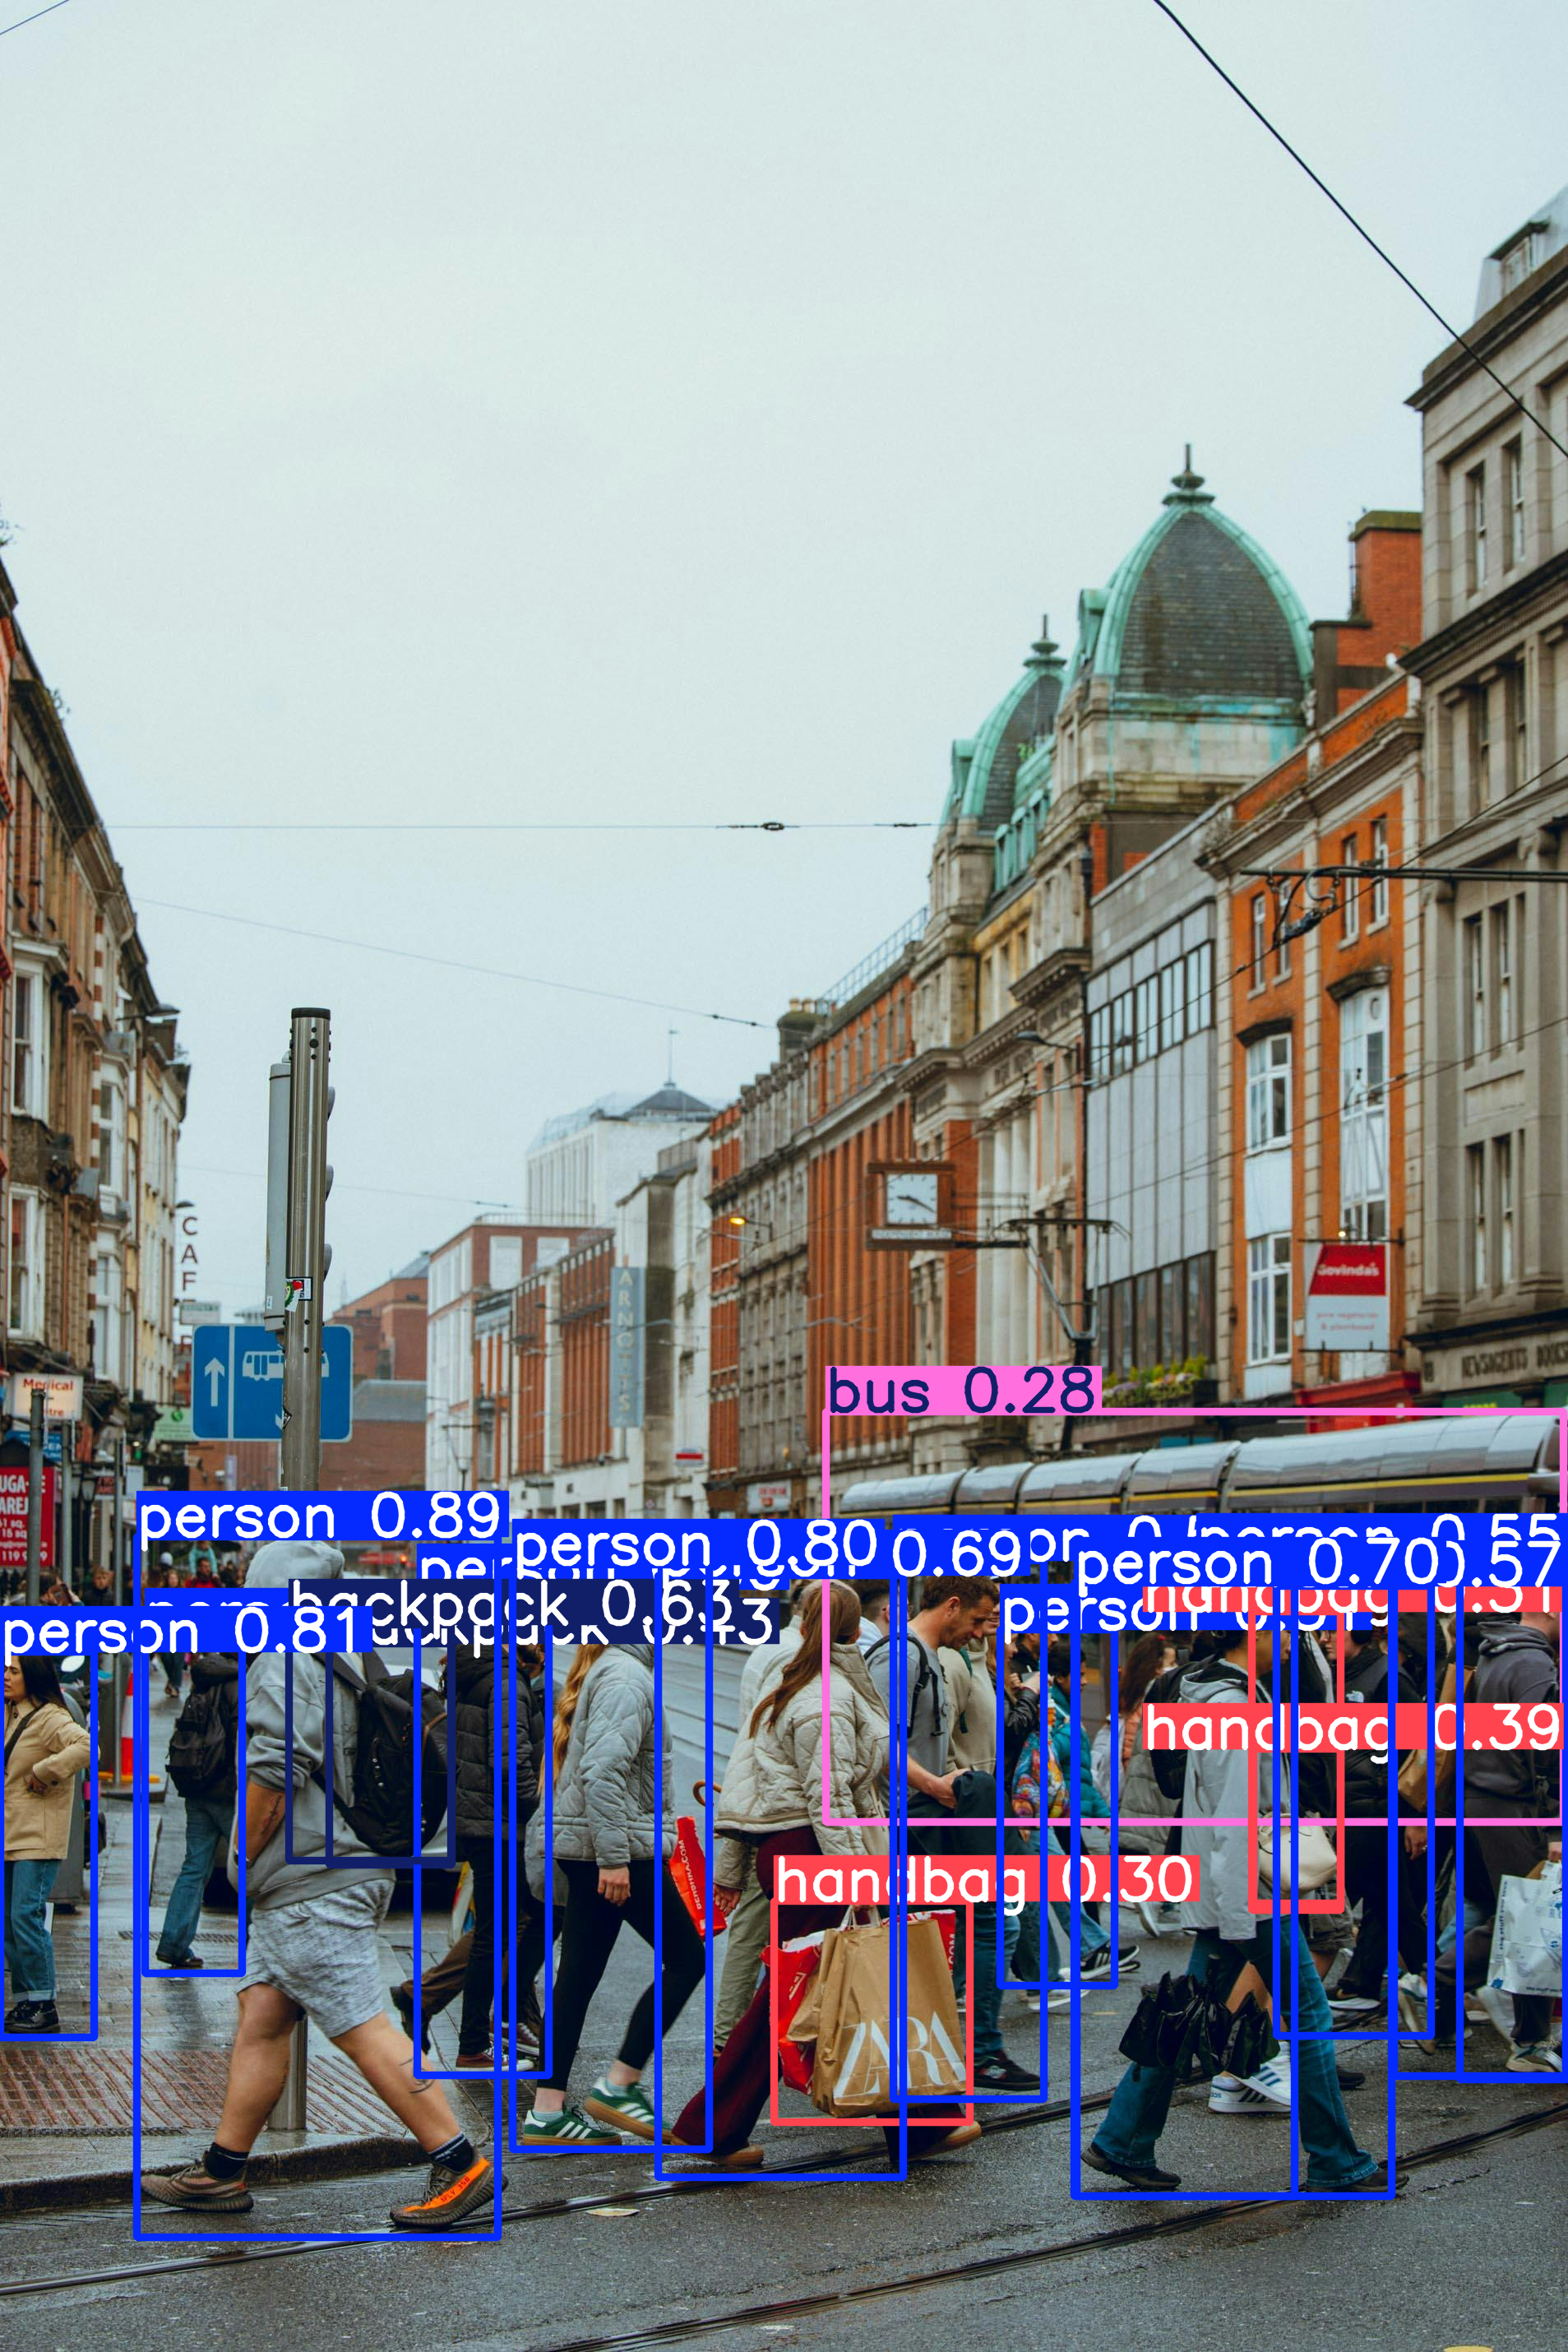

Detected: person with confidence 0.89
Detected: person with confidence 0.81
Detected: person with confidence 0.80
Detected: person with confidence 0.70
Detected: person with confidence 0.69
Detected: backpack with confidence 0.63
Detected: person with confidence 0.60
Detected: person with confidence 0.57
Detected: person with confidence 0.55
Detected: person with confidence 0.53
Detected: person with confidence 0.48
Detected: backpack with confidence 0.43
Detected: handbag with confidence 0.39
Detected: person with confidence 0.35
Detected: person with confidence 0.33
Detected: handbag with confidence 0.31
Detected: person with confidence 0.31
Detected: handbag with confidence 0.30


1

In [6]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow  # Only needed in Google Colab

# Load pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # "n" = nano (small & fast)

# Load your image
img = cv2.imread("/content/BAG1.jpg")  # <-- path to your image

# Run detection
results = model(img)

# Annotate the detected objects on the image
annotated_img = results[0].plot()

# Show the annotated image in Colab
cv2_imshow(annotated_img)  # Use cv2_imshow in Colab
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optional: Print detected objects
target_classes = ["person", "backpack", "handbag", "suitcase"]
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    class_name = model.names[cls_id]
    conf = float(box.conf[0])
    if class_name in target_classes:
        print(f"Detected: {class_name} with confidence {conf:.2f}")
1